In [6]:
import numpy as np
import pandas as pd

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# **Data** **Preprocessing**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [12]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

 *Data has no missing values*

**Removing Duplicates**

In [13]:
df.drop_duplicates()
print(df.shape)

(4981, 11)


*Data has no duplicates*

**Removing** **Outliers**

In [14]:
column_name = 'hypertension'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of outliers
outlier_indices = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Remove outliers from the DataFrame
df = df[~outlier_indices]

print(df.shape)

(4502, 11)


In [15]:
column_name = 'heart_disease'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of outliers
outlier_indices = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Remove outliers from the DataFrame
df = df[~outlier_indices]

print(df.shape)

(4291, 11)


In [16]:
column_name = 'avg_glucose_level'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of outliers
outlier_indices = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Remove outliers from the DataFrame
df = df[~outlier_indices]

print(df.shape)

(3890, 11)


In [17]:
column_name = 'bmi'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of outliers
outlier_indices = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Remove outliers from the DataFrame
df = df[~outlier_indices]

print(df.shape)

(3850, 11)


no age outliers

479 hypertension outliers

211 heart_disease outliers

401 avg_glucose_level outliers

40 bmi Outliers

1131 Otliers in total

# Exploratory Data Analysis (EDA)

Count Plot that show useful information about Categorical Attributes

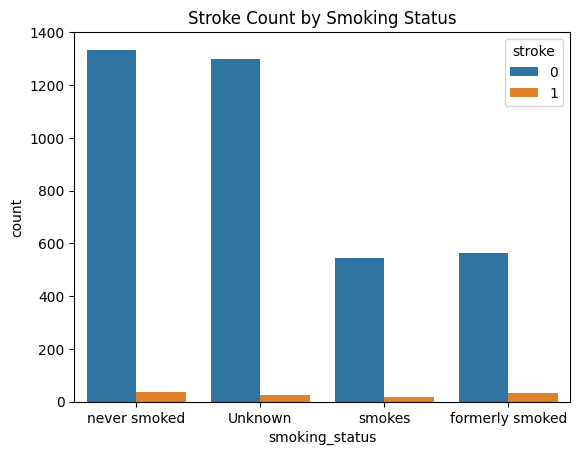

In [18]:
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke Count by Smoking Status')
plt.show()

People who never smoked have the highest number of no stroke hence smoking status might hav an effect on the prediction

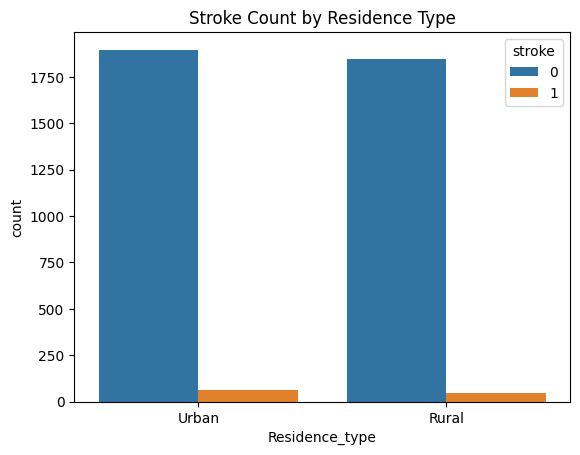

In [19]:
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Stroke Count by Residence Type')
plt.show()

The numbers for Rural and Urban are very close so removing it will not effect the predicition

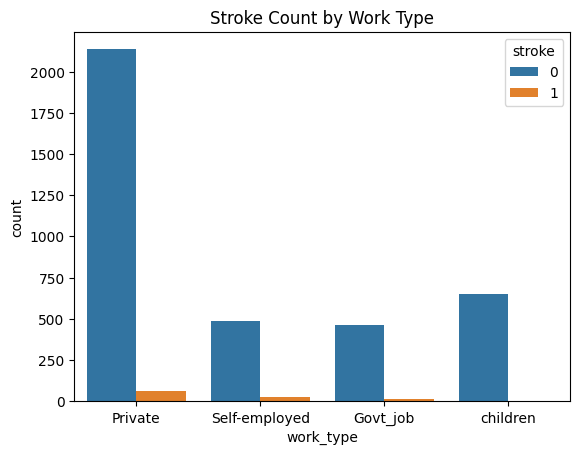

In [20]:
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Count by Work Type')
plt.show()

private has most brain strokes then Self Employed then Government jobs then children

Work type is likely going to effect the prediction

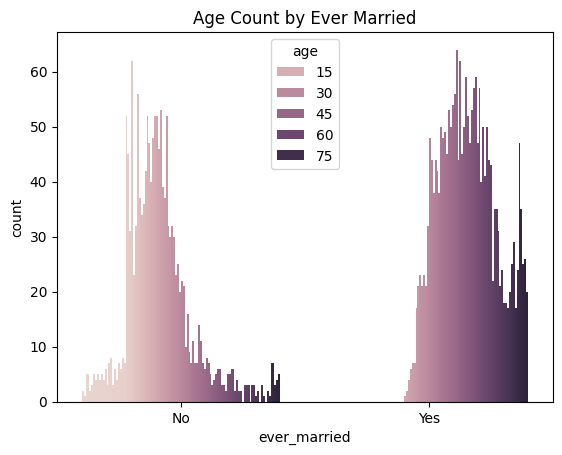

In [21]:
sns.countplot(x='ever_married', hue='age', data=df)
plt.title('Age Count by Ever Married')
plt.show()

Ever married is related to age as the older the person the more the chance he/she is married hence age is sufficient we dont need this attribute because they are correlated

**Histograms for numerical data**

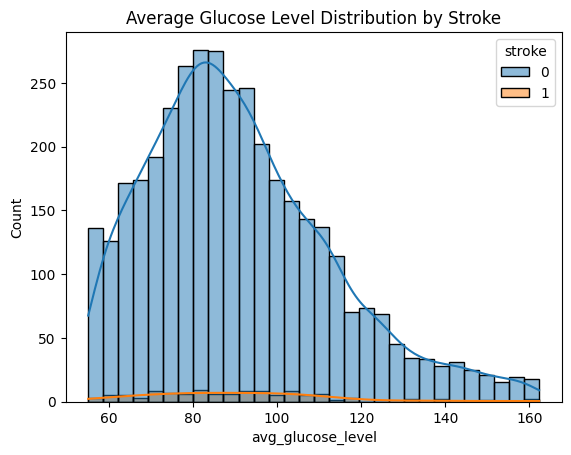

In [22]:
sns.histplot(x='avg_glucose_level', hue='stroke', data=df, kde=True)
plt.title('Average Glucose Level Distribution by Stroke')
plt.show()

The people with strokes have lower values in the glucose level so this is an important factor

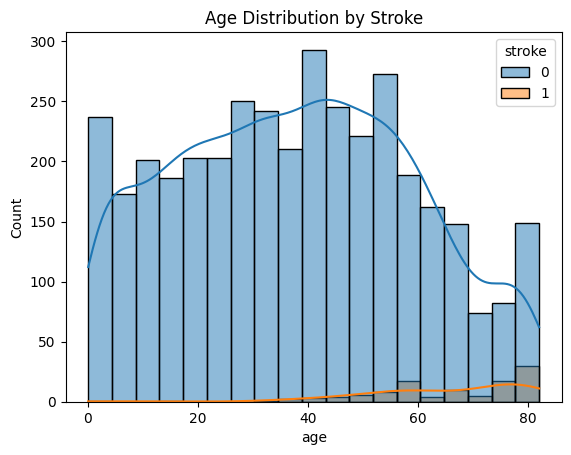

In [23]:
sns.histplot(x='age', hue='stroke', data=df, kde=True)
plt.title('Age Distribution by Stroke')
plt.show()

 The stroke count increases vey clearly when the age increases showing that age is a very important factor

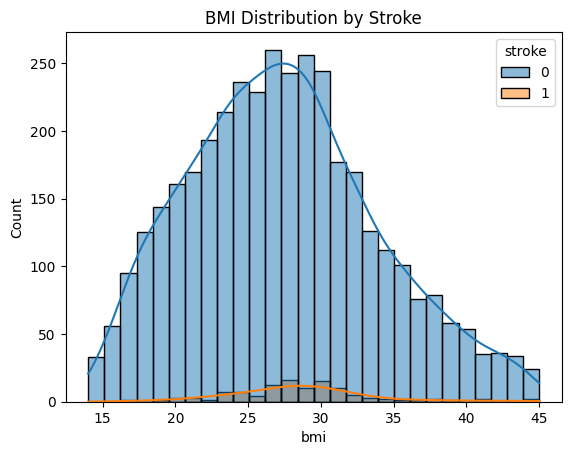

In [24]:
sns.histplot(x='bmi', hue='stroke', data=df, kde=True)
plt.title('BMI Distribution by Stroke')
plt.show()

BMI Distribution is normally distributed, but the stroke is clearly around the mean

**Encoding Data**

In [25]:
#checking for category data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 6 to 4979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3850 non-null   object 
 1   age                3850 non-null   float64
 2   hypertension       3850 non-null   int64  
 3   heart_disease      3850 non-null   int64  
 4   ever_married       3850 non-null   object 
 5   work_type          3850 non-null   object 
 6   Residence_type     3850 non-null   object 
 7   avg_glucose_level  3850 non-null   float64
 8   bmi                3850 non-null   float64
 9   smoking_status     3850 non-null   object 
 10  stroke             3850 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 360.9+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df["gender"]=l1.fit_transform(df["gender"])
df["ever_married"]=l1.fit_transform(df["ever_married"])
df["work_type"]=l1.fit_transform(df["work_type"])
df["Residence_type"]=l1.fit_transform(df["Residence_type"])
df["smoking_status"]=l1.fit_transform(df["smoking_status"])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
7,0,78.0,0,0,1,1,1,58.57,24.2,0,1
10,0,54.0,0,0,1,1,1,104.51,27.3,3,1
15,0,60.0,0,0,0,1,1,89.22,37.8,2,1
20,1,71.0,0,0,1,1,1,102.87,27.2,1,1


**Check the Corelation of Data Columns**

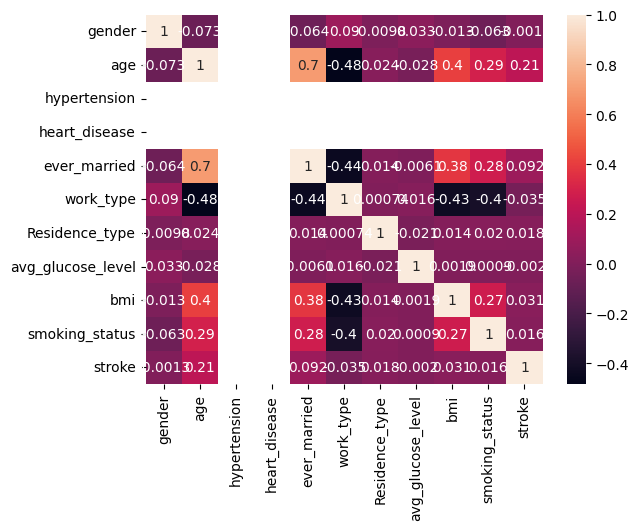

In [27]:
import seaborn as sns
d=df.corr()
sns.heatmap(data=d,annot=True)
plt.show()

The highest correlation with the stroke is the age

The heart_disease, glucose level and hypertension effect stroke in the same way a little less than age

The ever_married has a slight effect

The rest of the attributes have very low correlation hence they are of low importance


If a column in a heatmap is fully white, it typically indicates that the values in that particular column are consistently high or the same across all rows. In other words, there is little to no variation in the values of that specific variable.

# Model Selection and Training

**Data Splitting**

In [28]:
from sklearn.model_selection import train_test_split
x = df.drop(['stroke'], axis=1)
y = df['stroke']
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

**Dropping columns with low correlation and no important information**

In [29]:
from sklearn.model_selection import train_test_split
dx = df.drop(['stroke','Residence_type','ever_married'], axis=1)
dy = df['stroke']
dx_train , dx_test , dy_train , dy_test = train_test_split(dx,dy , test_size= 0.2 , random_state=42)

**Scalling**

In [30]:
#Standardization Scaling
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.fit_transform(x_test)


dx_train=std_scaler.fit_transform(dx_train)
dx_test=std_scaler.fit_transform(dx_test)

# Models Implementation

In [31]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

Splitting the dataset

In [32]:
train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=df[df.columns[:-1]]
Y=df["stroke"]

In [33]:
print(train_X)

      gender    age  hypertension  heart_disease  ever_married  work_type  \
2417       0  69.00             0              0             1          1   
1916       0   8.00             0              0             0          3   
3563       0  32.00             0              0             1          1   
2429       1  42.00             0              0             1          1   
464        1  67.00             0              0             1          2   
...      ...    ...           ...            ...           ...        ...   
4330       1  42.00             0              0             1          1   
4767       1   1.08             0              0             0          3   
3972       1  36.00             0              0             1          1   
1779       0  70.00             0              0             1          1   
577        0  27.00             0              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
2417       

In [34]:
print(train_Y)

      stroke
2417       0
1916       0
3563       0
2429       0
464        0
...      ...
4330       0
4767       0
3972       0
1779       0
577        0

[2695 rows x 1 columns]


#### Linear Support Vector Machine(linear-SVM)

In [35]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for linear SVM is 0.9714285714285714


#### Logistic Regression

In [36]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9714285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

In [37]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9523809523809523


#### K-Nearest Neighbours(KNN)

In [38]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the KNN is 0.9705627705627705


#### Gaussian Naive Bayes

In [39]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.9714285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Random Forests

In [40]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

<ipython-input-40-59a13eb81d35>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X,train_Y)


The accuracy of the Random Forests is 0.9714285714285714


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10)
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
new_models_dataframe2